<a href="https://colab.research.google.com/github/sandadi-pranavi/pipeline-1/blob/main/BUSINESSPROBLEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pulp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 30.4 MB/s eta 0:00:00


In [2]:
import pulp

# Initialize the problem
model = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)

# Define decision variables
x = pulp.LpVariable('Product_A', lowBound=0, cat='Continuous')
y = pulp.LpVariable('Product_B', lowBound=0, cat='Continuous')

# Objective Function: Maximize 20x + 30y
model += 20 * x + 30 * y, "Total Profit"

# Constraints
model += 2 * x + 4 * y <= 100, "Machine Time Constraint"
model += 3 * x + 1 * y <= 90, "Labor Hours Constraint"

# Solve the problem
model.solve()


1

In [3]:
print("Status:", pulp.LpStatus[model.status])
print(f"Produce {x.varValue:.2f} units of Product A")
print(f"Produce {y.varValue:.2f} units of Product B")
print(f"Maximum Profit: ₹{pulp.value(model.objective):.2f}")


Status: Optimal
Produce 26.00 units of Product A
Produce 12.00 units of Product B
Maximum Profit: ₹880.00


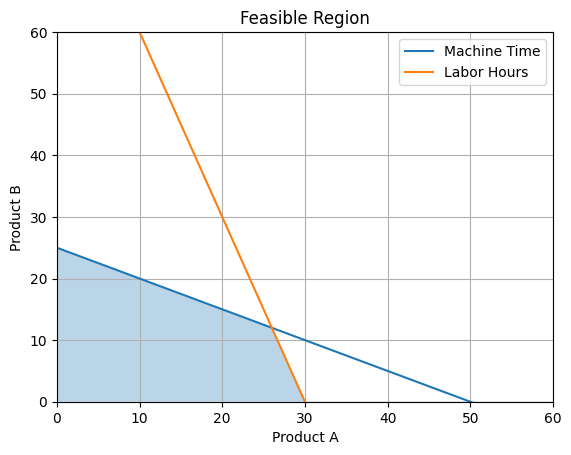

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x_vals = np.linspace(0, 60, 400)
y1 = (100 - 2 * x_vals) / 4     # From Machine constraint
y2 = (90 - 3 * x_vals) / 1      # From Labor constraint

plt.plot(x_vals, y1, label='Machine Time')
plt.plot(x_vals, y2, label='Labor Hours')
plt.fill_between(x_vals, np.minimum(y1, y2), alpha=0.3)

plt.xlim((0, 60))
plt.ylim((0, 60))
plt.xlabel('Product A')
plt.ylabel('Product B')
plt.title('Feasible Region')
plt.legend()
plt.grid(True)
plt.show()
